In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, GlobalMaxPool1D, LSTM, GRU
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

import math

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

np.random.seed(123)
tf.random.set_seed(123)

In [247]:
df=pd.read_csv('./HINDUNILVR.csv',index_col='Date',parse_dates=True)

In [248]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,HINDLEVER,EQ,2136.60,2300.0,2307.55,2300.00,2307.55,2307.55,2307.08,24903,5.745330e+12,NaN,NaN,NaN
2000-01-04,HINDLEVER,EQ,2307.55,2381.0,2381.00,2250.00,2270.00,2281.05,2298.15,58514,1.344740e+13,NaN,NaN,NaN
2000-01-05,HINDLEVER,EQ,2281.05,2200.0,2250.00,2105.00,2183.50,2199.90,2211.17,80296,1.775482e+13,NaN,NaN,NaN
2000-01-06,HINDLEVER,EQ,2199.90,2224.9,2360.00,2210.00,2300.00,2288.20,2301.80,190032,4.374157e+13,NaN,NaN,NaN
2000-01-07,HINDLEVER,EQ,2288.20,2300.0,2452.00,2282.25,2395.00,2412.95,2380.24,192582,4.583919e+13,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,HINDUNILVR,EQ,2307.75,2324.0,2369.80,2311.00,2367.70,2360.65,2340.89,1946867,4.557405e+14,85684.0,1289103.0,0.6621
2021-04-27,HINDUNILVR,EQ,2360.65,2363.0,2386.45,2352.95,2378.00,2379.85,2374.40,1668456,3.961583e+14,84641.0,1089882.0,0.6532
2021-04-28,HINDUNILVR,EQ,2379.85,2380.0,2445.00,2366.30,2404.00,2406.55,2414.15,1951215,4.710522e+14,84910.0,1024216.0,0.5249


In [249]:
df['Date']=df.index

In [250]:
start_date='2020-01-01'
end_date='2020-12-31'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)

In [251]:
df=df.loc[mask]

In [252]:
df=df.drop(columns=['Series','Symbol','Open','High','Low','Last','Close','VWAP','Volume','Turnover','Trades','Deliverable Volume','%Deliverble','Date'])

In [253]:
Ntest=math.trunc(0.3*len(df))
train=df.iloc[:-Ntest]
test=df.iloc[-Ntest:]

In [254]:
train_idx=df.index<=train.index[-1]
test_idx=df.index>train.index[-1]

In [255]:
df['Diff Prev Close']=df['Prev Close'].diff()

In [256]:
series=df['Diff Prev Close'].dropna().to_numpy()

T=50
X=[]
Y=[]
for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)

X=np.array(X).reshape(-1,T)
Y=np.array(Y)
N=len(X)
print("X.shape",X.shape,"Y.shape",Y.shape)

X.shape (201, 50) Y.shape (201,)


In [257]:
Xtrain,Ytrain=X[:-Ntest],Y[:-Ntest]
Xtest,Ytest=X[-Ntest:],Y[-Ntest:]

LSTM+CNN

In [258]:
i=Input(shape=(T,1))
x=LSTM(200,return_sequences=True)(i)
x=LSTM(200,return_sequences=True)(x)
x=Dense(100)(x)
x=Dense(50)(x)
x=Conv1D(25,3,activation='relu')(i)
x=MaxPooling1D(2)(x)
x=Conv1D(50,3,activation='relu')(x)
x=GlobalMaxPool1D()(x)
x=Dense(1)(x)
model_lstm_cnn=Model(i,x)
model_lstm_cnn.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 50, 1)]           0         
                                                                 
 conv1d_12 (Conv1D)          (None, 48, 25)            100       
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 24, 25)           0         
 1D)                                                             
                                                                 
 conv1d_13 (Conv1D)          (None, 22, 50)            3800      
                                                                 
 global_max_pooling1d_13 (Gl  (None, 50)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_55 (Dense)            (None, 1)                 51 

In [259]:
check_point_lstm_cnn=ModelCheckpoint('best_model.h5',monitor='val_loss',save_best_only=True)

In [260]:
model_lstm_cnn.compile(loss='mse',
              optimizer='adamax',
              metrics=['mae','mse'])

In [261]:
r=model_lstm_cnn.fit(
    Xtrain,
    Ytrain,
    epochs=100,
    validation_data=(Xtest,Ytest),
    callbacks=[check_point_lstm_cnn]
)

Epoch 1/100
4/4 [==============================] - 1s 76ms/step - loss: 3335.4072 - mae: 37.3857 - mse: 3335.4072 - val_loss: 772.6219 - val_mae: 21.5423 - val_mse: 772.6219
Epoch 2/100
4/4 [==============================] - 0s 20ms/step - loss: 3253.3252 - mae: 37.2312 - mse: 3253.3252 - val_loss: 770.0565 - val_mae: 21.4884 - val_mse: 770.0565
Epoch 3/100
4/4 [==============================] - 0s 20ms/step - loss: 3190.5100 - mae: 36.3976 - mse: 3190.5100 - val_loss: 777.3041 - val_mae: 21.6120 - val_mse: 777.3041
Epoch 4/100
4/4 [==============================] - 0s 16ms/step - loss: 3174.5347 - mae: 36.1220 - mse: 3174.5347 - val_loss: 775.5352 - val_mae: 21.5675 - val_mse: 775.5352
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 3159.0002 - mae: 35.8970 - mse: 3159.0002 - val_loss: 775.3289 - val_mae: 21.5570 - val_mse: 775.3289
Epoch 6/100
4/4 [==============================] - 0s 20ms/step - loss: 3135.9097 - mae: 35.7714 - mse: 3135.9097 - val_loss: 768.

LSTM+GRU

In [262]:
i=Input(shape=(T,1))
x=LSTM(200,return_sequences=True)(i)
x=LSTM(200,return_sequences=True)(x)
x=Dense(100)(x)
x=Dense(50)(x)
x=GRU(200,return_sequences=True)(x)
x=GRU(200,return_sequences=True)(x)
x=GlobalMaxPool1D()(x)
x=Dense(100)(x)
x=Dense(50)(x)
x=Dense(1)(x)
model_lstm_gru=Model(i,x)
model_lstm_gru.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 50, 1)]           0         
                                                                 
 lstm_28 (LSTM)              (None, 50, 200)           161600    
                                                                 
 lstm_29 (LSTM)              (None, 50, 200)           320800    
                                                                 
 dense_56 (Dense)            (None, 50, 100)           20100     
                                                                 
 dense_57 (Dense)            (None, 50, 50)            5050      
                                                                 
 gru_14 (GRU)                (None, 50, 200)           151200    
                                                                 
 gru_15 (GRU)                (None, 50, 200)           241

In [263]:
check_point_lstm_gru=ModelCheckpoint('best_model.h5',monitor='val_loss',save_best_only=True)

In [264]:
model_lstm_gru.compile(loss='mse',
              optimizer='adamax',
              metrics=['mae','mse'])

In [265]:
r=model_lstm_gru.fit(
    Xtrain,
    Ytrain,
    epochs=100,
    validation_data=(Xtest,Ytest),
    callbacks=[check_point_lstm_gru]
)

Epoch 1/100
4/4 [==============================] - 12s 1s/step - loss: 3214.0042 - mae: 36.7605 - mse: 3214.0042 - val_loss: 745.5524 - val_mae: 21.1926 - val_mse: 745.5524
Epoch 2/100
4/4 [==============================] - 2s 632ms/step - loss: 3212.4102 - mae: 36.8538 - mse: 3212.4102 - val_loss: 743.9487 - val_mae: 21.1825 - val_mse: 743.9487
Epoch 3/100
4/4 [==============================] - 2s 609ms/step - loss: 3210.5347 - mae: 36.7874 - mse: 3210.5347 - val_loss: 747.2246 - val_mae: 21.2021 - val_mse: 747.2246
Epoch 4/100
4/4 [==============================] - 2s 606ms/step - loss: 3210.4827 - mae: 36.7933 - mse: 3210.4827 - val_loss: 746.4712 - val_mae: 21.1984 - val_mse: 746.4712
Epoch 5/100
4/4 [==============================] - 2s 614ms/step - loss: 3208.2976 - mae: 36.7800 - mse: 3208.2976 - val_loss: 747.0168 - val_mae: 21.2023 - val_mse: 747.0168
Epoch 6/100
4/4 [==============================] - 2s 621ms/step - loss: 3206.2937 - mae: 36.7748 - mse: 3206.2937 - val_loss: 

Predictions



In [266]:
train_idx[:T+1]=False

In [267]:
Ptrain_lstm_cnn=model_lstm_cnn.predict(Xtrain).flatten()
Ptest_lstm_cnn=model_lstm_cnn.predict(Xtest).flatten()

In [268]:
Ptrain_lstm_gru=model_lstm_gru.predict(Xtrain).flatten()
Ptest_lstm_gru=model_lstm_gru.predict(Xtest).flatten()

In [ ]:
df.loc[train_idx,'Diff LSTM+CNN train prediction']=Ptrain_lstm_cnn
df.loc[test_idx,'Diff LSTM+CNN test prediction']=Ptest_lstm_cnn

In [269]:
df.loc[train_idx,'Diff LSTM+GRU train prediction']=Ptrain_lstm_gru
df.loc[test_idx,'Diff LSTM+GRU test prediction']=Ptest_lstm_gru

In [270]:
df['Shift Prev Close']=df['Prev Close'].shift(1)
prev=df['Shift Prev Close']

In [271]:
last_train=train.iloc[-1]['Prev Close']

In [272]:
df.loc[train_idx,'train_LSTM_CNN']=prev[train_idx]+Ptrain_lstm_cnn
df.loc[test_idx,'Prediction_LSTM_CNN']=prev[test_idx]+Ptest_lstm_cnn

In [273]:
df.loc[train_idx,'train_LSTM_GRU']=prev[train_idx]+Ptrain_lstm_gru
df.loc[test_idx,'Prediction_LSTM_GRU']=prev[test_idx]+Ptest_lstm_gru

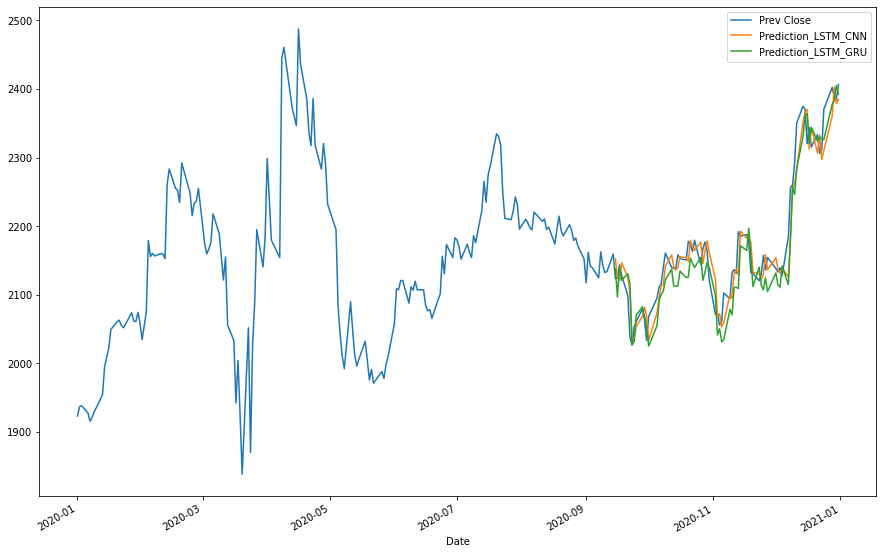

In [274]:
df[['Prev Close' ,'Prediction_LSTM_CNN','Prediction_LSTM_GRU']].plot(figsize=(15,10));

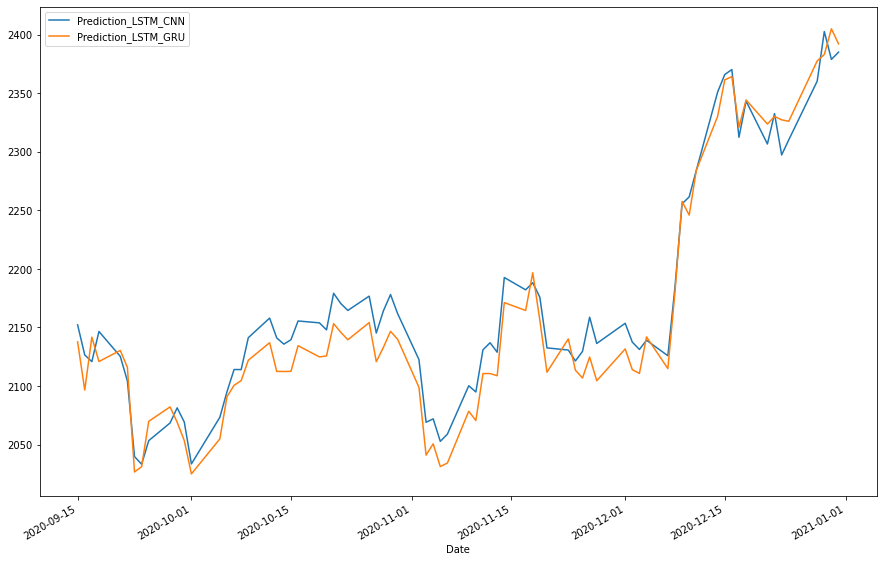

In [275]:
df[['Prediction_LSTM_CNN','Prediction_LSTM_GRU']].plot(figsize=(15,10));

In [276]:
pred_lstm_cnn=df['Prediction_LSTM_CNN']
pred_lstm_cnn.dropna(inplace=True)

In [277]:
rmse=math.sqrt(mean_squared_error(test['Prev Close'],pred_lstm_cnn))
print(rmse)

27.97099767407276


In [278]:
error=mean_absolute_error(test['Prev Close'],pred_lstm_cnn)
print(error)

21.737902774748672


In [279]:
r2_score(test['Prev Close'],pred_lstm_cnn)

0.9212253364054785

In [280]:
pred_lstm_gru=df['Prediction_LSTM_GRU']
pred_lstm_gru.dropna(inplace=True)

In [281]:
rmse=math.sqrt(mean_squared_error(test['Prev Close'],pred_lstm_cnn))
print(rmse)

27.97099767407276


In [282]:
error=mean_absolute_error(test['Prev Close'],pred_lstm_gru)
print(error)

27.64889917437233


In [283]:
r2_score(test['Prev Close'],pred_lstm_gru)

0.8854263545784662